# Illustrated Sequential Proportional Approval Voting

In [276]:
import pandas

# Code and setup.

ballots = pandas.read_json('fixtures/approval_ballots.json')
seats = 3
seated = []
max_satisfaction = ballots.values.max()
round_number = 1



def plot_round_count(ballots):
    return ballots.transpose().plot(kind='bar', stacked=True, edgecolor='white', linewidth=1, ylim=(0,10),
                     xlabel='Candidate', ylabel='Votes', title=f'Round {round_number} Count')


def reweight(ballot: pandas.DataFrame) -> pandas.DataFrame:
    satisfaction = ballot[ballot.index.isin(seated)].sum()
    weight = 1/(1+satisfaction/max_satisfaction)
    return ballot.apply(lambda x: weight*x)


def count(ballots):
    return ballots.sum().drop(seated, errors='ignore').sort_values(ascending=False)


def nextRound(ballots):
    global round_number
    round_number = round_number + 1
    reweighted = ballots.apply(reweight, axis=1)
    round_count = count(reweighted)
    seated.append(round_count.idxmax())
    return reweighted, round_count


# Round 1

In round one we only need to count the candidate with the highest votes and then seat that them. In this case it's Blueberry.

Blueberry     7.0
Strawberry    6.0
Apple         5.0
Squash        3.0
dtype: float64
Seated: ['Blueberry']


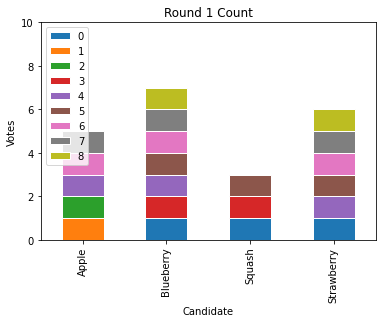

In [277]:
plot_round_count(ballots.apply(reweight, axis=1).drop(seated, axis=1))
ballots, round_count = nextRound(ballots)
print(round_count)
print(f"Seated: {seated }")


# Round 2

In round two we reweight the ballots. Ballot 1 was previously in support of Blueberry, Squash and Strawberry. Now that Blueberry is seated, this voter's ballot has 1 point of satisfaction. Because of their statisfaction, their votes for other candidates is reduced by $\frac{1}{(1+\frac{Satisfaction}{Max Satisfaction})}$ = $\frac{1}{(1+\frac{1}{1})}$ = $\frac{1}{2}$. Their votes for Squash are now worth 0.5 and Strawberry 0.5.

Apple         3.5
Strawberry    3.0
Squash        1.5
dtype: float64
Seated: ['Blueberry', 'Apple']


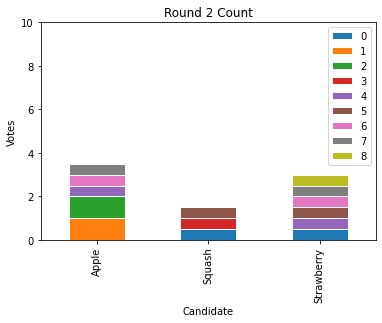

In [278]:
plot_round_count(ballots.apply(reweight, axis=1).drop(seated, axis=1))
ballots, round_count = nextRound(ballots)
print(round_count)
print(f"Seated: {seated }")


Because a lot of votes for Strawberry were correlated with vote for Blueberry, Strawberry, despite being in 2nd place in Round 1, doesn't have the highest score in Round 2. Apple has the highest score of 3.5, and is seated.

# Round 3

In round 3 Squash catches up but isn't able to overcome Strawberry's lead.

Strawberry    1.75
Squash        1.00
dtype: float64
Seated: ['Blueberry', 'Apple', 'Strawberry']


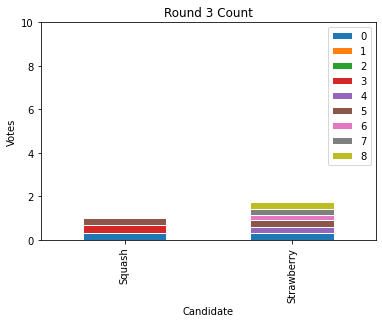

In [279]:
plot_round_count(ballots.apply(reweight, axis=1).drop(seated, axis=1))
ballots, round_count = nextRound(ballots)
print(round_count)
print(f"Seated: {seated }")
